## Spotify

Leer todos los csv de una carpeta y cargarlos en un unico dataframe de pandas.

Este enfoque sirve cuando los CSv tienen la misma estructura de datos

In [2]:
import pandas as pd
import os

## Cargar datos

In [4]:
file_names = os.listdir('../dataset/spotify/')
file_names


['1950.csv',
 '1960.csv',
 '1970.csv',
 '1980.csv',
 '1990.csv',
 '2000.csv',
 '2010.csv']

In [6]:
df = pd.DataFrame()
for file_name in file_names:
    df_current = pd.read_csv('../dataset/spotify/' + file_name)
    print(file_name, df_current.shape)
    df = pd.concat([df, df_current], ignore_index=True)

1950.csv (73, 15)
1960.csv (97, 15)
1970.csv (104, 15)
1980.csv (105, 15)
1990.csv (88, 15)
2000.csv (100, 15)
2010.csv (100, 15)


In [7]:
df.shape

(667, 15)

In [8]:
df.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,2,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,3,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,4,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,5,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


In [9]:
df.shape

(667, 15)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Number     667 non-null    int64 
 1   title      667 non-null    object
 2   artist     667 non-null    object
 3   top genre  651 non-null    object
 4   year       667 non-null    int64 
 5   bpm        667 non-null    int64 
 6   nrgy       667 non-null    int64 
 7   dnce       667 non-null    int64 
 8   dB         667 non-null    int64 
 9   live       667 non-null    int64 
 10  val        667 non-null    int64 
 11  dur        667 non-null    int64 
 12  acous      667 non-null    int64 
 13  spch       667 non-null    int64 
 14  pop        667 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 78.3+ KB


## Tratamiento de nulos

Se detectan valores nulos en la columna top genre

In [12]:
df.isnull().sum()

Number        0
title         0
artist        0
top genre    16
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [13]:
df.describe()

,Number,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,48.718141,1994.967016,119.121439,61.394303,60.325337,-8.356822,18.188906,57.311844,224.002999,29.917541,6.179910,63.349325
std,28.414748,17.771374,25.030827,21.703963,15.051583,3.659509,14.380929,24.400412,59.742591,28.865081,6.191199,13.725845
min,1.000000,1945.000000,62.000000,6.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,24.000000,1980.000000,101.500000,45.000000,51.000000,-11.000000,9.000000,39.000000,185.000000,6.000000,3.000000,56.000000
50%,48.000000,1998.000000,120.000000,64.000000,62.000000,-8.000000,13.000000,58.000000,218.000000,19.000000,4.000000,66.000000
75%,72.000000,2010.000000,134.000000,79.000000,71.000000,-6.000000,24.000000,78.000000,254.000000,52.000000,6.000000,73.500000
max,105.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,94.000000


In [15]:
df['top genre'].fillna("undefined", inplace=True)
df.isnull().sum()

Number       0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

In [16]:
top_genre_mode = df['top genre'].mode().iloc[0]
top_genre_mode

'dance pop'

In [17]:
# para ver si una columna esta duplicada
df.duplicated().sum()


0

In [18]:
# borrar columnas
df.drop('Number', axis=1, inplace=True)

In [19]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,Put Your Head On My Shoulder,Paul Anka,adult standards,2000,116,34,55,-9,10,47,155,75,3,72
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Everybody Loves Somebody,Dean Martin,adult standards,2013,81,49,26,-9,34,40,162,81,4,61
3,Take Good Care Of My Baby - 1990 Remastered,Bobby Vee,adult standards,2011,82,43,49,-12,12,66,151,70,6,60
4,A Teenager In Love,Dion & The Belmonts,adult standards,1959,79,38,56,-9,13,62,158,67,3,60


## Ordenar por años

In [23]:
df.sort_values('year', inplace=True)
df.reset_index(drop=True, inplace=True)# rehacer el índice
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,If I Give My Heart to You (with The Mellomen) ...,Doris Day,adult standards,1945,77,6,50,-16,10,33,169,97,5,52
1,Whatever Will Be Will Be (Que Sera Sera) (with...,Doris Day,adult standards,1948,177,34,42,-11,72,78,123,86,4,62
2,Held for Questioning,Rusty Draper,deep adult standards,1953,109,65,70,-2,14,85,146,79,3,26
3,Only Because,The Platters,adult standards,1957,73,28,55,-10,9,47,174,85,3,44
4,Chicago - Remastered,Frank Sinatra,adult standards,1958,148,46,51,-10,40,79,134,61,7,47


In [24]:
df.tail()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
662,Sunflower - Spider-Man: Into the Spider-Verse,Post Malone,dfw rap,2019,90,52,76,-4,7,93,158,53,6,86
663,Last Christmas,Wham!,dance rock,2019,108,58,74,-9,18,94,265,19,3,78
664,You Don't Know Me (feat. RAYE),Jax Jones,dance pop,2019,124,67,88,-6,32,67,213,16,14,70
665,Marianne,The Hilltoppers,deep adult standards,2019,106,55,71,-8,19,82,137,73,4,33
666,Impossible - Main,Shontelle,barbadian pop,2019,90,57,59,-5,11,51,226,44,4,32


## Visualización

<Axes: >

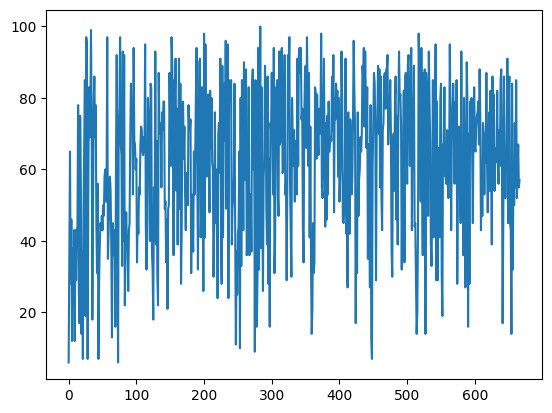

In [28]:
df['nrgy'].plot()

<Axes: >

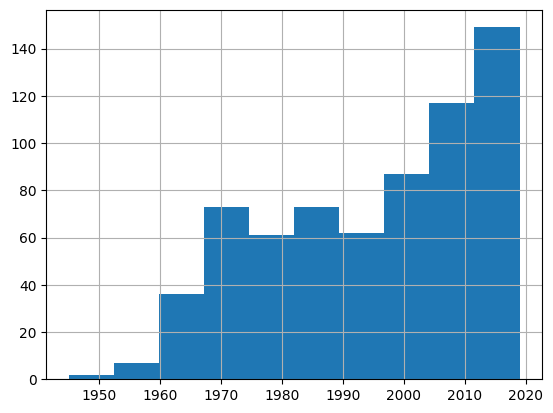

In [32]:
df['year'].hist()

## Mostrar géneros y artistas mas repetidos

In [33]:
df['top genre'].mode()

0    dance pop
Name: top genre, dtype: object

In [35]:
serie = df['top genre'].value_counts()
pd.DataFrame(serie).head(10)

,count
top genre,
dance pop,114
adult standards,93
album rock,77
glam rock,23
brill building pop,20
europop,17
undefined,16
boy band,15
dance rock,15


In [36]:
serie = df['artist'].value_counts()
pd.DataFrame(serie).head(10)

,count
artist,
Elton John,12
Queen,11
ABBA,9
The Beatles,7
Barbra Streisand,6
Rihanna,6
Whitney Houston,6
Mariah Carey,5
Taylor Swift,5


## Mostrar la canción más popupar y la menos popular

Columna pop

In [37]:
df['pop'].max()

94

In [38]:
df['pop'].idxmax()

653

In [40]:
df.loc[df['pop'].idxmax()]

title              bad guy
artist       Billie Eilish
top genre       electropop
year                  2019
bpm                    135
nrgy                    43
dnce                    70
dB                     -11
live                    10
val                     56
dur                    194
acous                   33
spch                    38
pop                     94
Name: 653, dtype: object

In [42]:
pd.DataFrame(df.loc[df['pop'].idxmin()]) #se mete en un df para visualizarlo mejor

,2
title,Held for Questioning
artist,Rusty Draper
top genre,deep adult standards
year,1953
bpm,109
nrgy,65
dnce,70
dB,-2
live,14
val,85
